# Data Clean Up and Filter to US Athlete Data

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import decimal

In [115]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [116]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [117]:
starter_age_df = df.loc[:, ['ID','Sex', 'Age',
                            'NOC', 'Year']]
starter_age_df.head(10)

,ID,Sex,Age,NOC,Year
0,1,M,24.0,CHN,1992
1,2,M,23.0,CHN,2012
2,3,M,24.0,DEN,1920
3,4,M,34.0,DEN,1900
4,5,F,21.0,NED,1988
5,5,F,21.0,NED,1988
6,5,F,25.0,NED,1992
7,5,F,25.0,NED,1992
8,5,F,27.0,NED,1994
9,5,F,27.0,NED,1994


In [124]:
starter_age_df.count()

ID      271116
Sex     271116
Age     261642
NOC     271116
Year    271116
dtype: int64

In [125]:
#Select only US participants
us_filter = starter_age_df[(starter_age_df["NOC"] == "USA")]
us_reduced = us_filter.dropna(how='any')
us_reduced.head(10)

,ID,Sex,Age,NOC,Year
10,6,M,31.0,USA,1992
11,6,M,31.0,USA,1992
12,6,M,31.0,USA,1992
13,6,M,31.0,USA,1992
14,6,M,33.0,USA,1994
15,6,M,33.0,USA,1994
16,6,M,33.0,USA,1994
17,6,M,33.0,USA,1994
18,7,M,31.0,USA,1992
19,7,M,31.0,USA,1992


In [126]:
us_reduced.count()

ID      18555
Sex     18555
Age     18555
NOC     18555
Year    18555
dtype: int64

In [128]:
#Calculate Total Players
total_us = len(us_reduced["ID"].value_counts())

#Format into a DataFrame
us_athlete_count = pd.DataFrame({"Total US Athletes":[total_us]})
us_athlete_count

,Total US Athletes
0,9499


In [132]:
us_reduced["USA_Age"] = us_reduced['ID'].map(str) + us_reduced['Age'].map(str)
us_reduced["USA_Age"].duplicated().sum()
us_reduced.duplicated(subset = ["USA_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5860

In [133]:
clean_graph = us_reduced.drop_duplicates(subset = ["USA_Age"])
clean_graph  = clean_graph .set_index("USA_Age")
clean_graph 

,ID,Sex,Age,NOC,Year
USA_Age,,,,,
631.0,6,M,31.0,USA,1992
633.0,6,M,33.0,USA,1994
731.0,7,M,31.0,USA,1992
733.0,7,M,33.0,USA,1994
8426.0,84,M,26.0,USA,2004
...,...,...,...,...,...
13543328.0,135433,M,28.0,USA,1996
13545827.0,135458,M,27.0,USA,2004
13545831.0,135458,M,31.0,USA,2008


In [134]:
clean_graph.count()

ID      12695
Sex     12695
Age     12695
NOC     12695
Year    12695
dtype: int64

# Average Age of Female Olympic Athletes

In [180]:
fem_filter = us_reduced[(starter_age_df["Sex"] == "F")]
fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ID         5518
Sex        5518
Age        5518
NOC        5518
Year       5518
USA_Age    5518
dtype: int64

In [186]:
female_age_year = fem_filter.groupby(["Year"])
age_count = round(female_age_year['Age'].mean())
fem_age_final = pd.DataFrame(data=age_count)
us_women_age = fem_age_final.reset_index()
us_women_age

,Year,Age
0,1900,26.0
1,1904,50.0
2,1920,20.0
3,1924,22.0
4,1928,24.0
5,1932,33.0
6,1936,23.0
7,1948,22.0
8,1952,24.0
9,1956,20.0


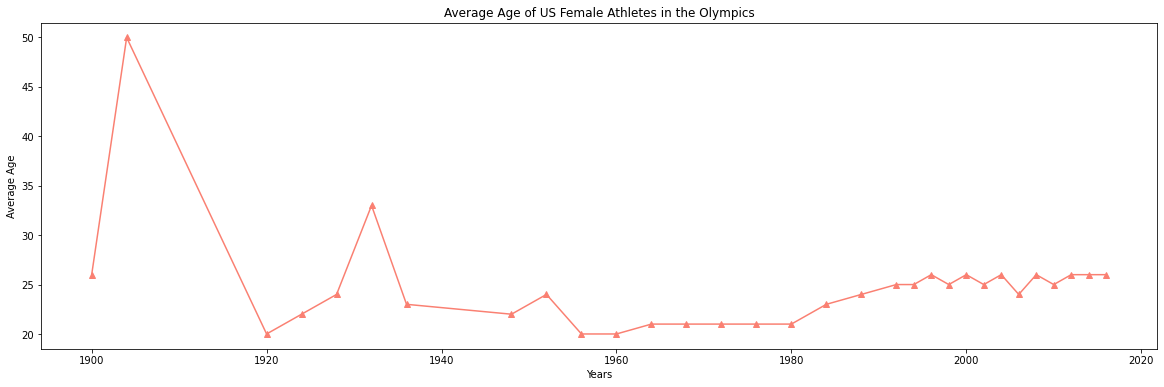

In [206]:
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon')

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Average Age of US Female Athletes in the Olympics")


plt.show()

# How does China compare to the US Average Female Age?

In [188]:
chn_filter = starter_age_df[(starter_age_df["NOC"] == "CHN")]
chn_reduced = chn_filter.dropna(how='any')
chn_reduced.head(10)

,ID,Sex,Age,NOC,Year
0,1,M,24.0,CHN,1992
1,2,M,23.0,CHN,2012
1072,602,M,22.0,CHN,2000
2611,1463,M,25.0,CHN,2004
2612,1464,F,14.0,CHN,2016
2613,1464,F,14.0,CHN,2016
6427,3605,M,22.0,CHN,2006
6428,3605,M,22.0,CHN,2006
6433,3610,M,19.0,CHN,1998
6434,3610,M,19.0,CHN,1998


In [189]:
chn_reduced["CHN_Age"] = chn_reduced['ID'].map(str) + chn_reduced['Age'].map(str)
chn_reduced["CHN_Age"].duplicated().sum()
chn_reduced.duplicated(subset = ["CHN_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1532

In [190]:
clean_chn = chn_reduced.drop_duplicates(subset = ["CHN_Age"])
clean_chn  = clean_chn  .set_index("CHN_Age")

In [191]:
chn_fem_filter = chn_reduced[(starter_age_df["Sex"] == "F")]
chn_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ID         2770
Sex        2770
Age        2770
NOC        2770
Year       2770
CHN_Age    2770
dtype: int64

In [192]:
chn_age = chn_fem_filter.groupby(["Year"])
chn_count = round(chn_age['Age'].mean())
chn_age_final = pd.DataFrame(data=chn_count)
women_age_chn = chn_age_final.reset_index()
women_age_chn

,Year,Age
0,1936,19.0
1,1948,35.0
2,1980,19.0
3,1984,21.0
4,1988,21.0
5,1992,21.0
6,1994,21.0
7,1996,22.0
8,1998,22.0
9,2000,22.0


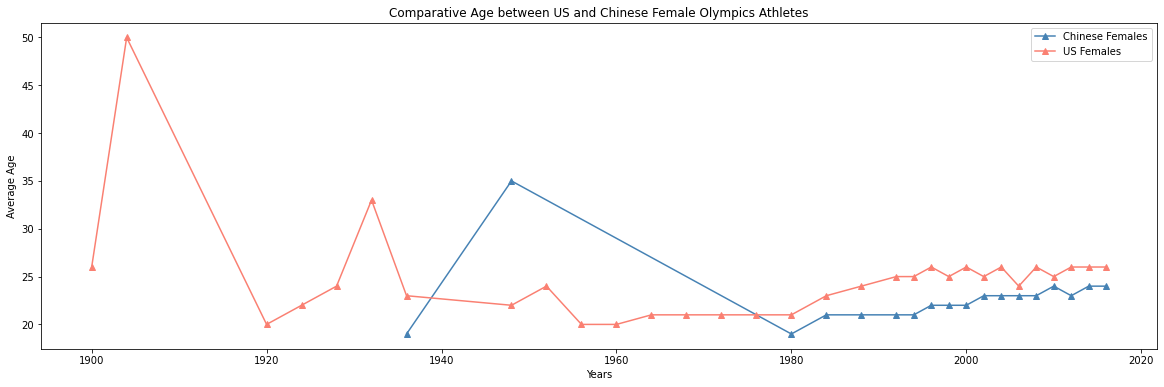

In [207]:
women_chn = women_age_chn
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(women_chn['Year'], women_chn['Age'], marker = '^', color='steelblue', label= "Chinese Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Comparative Age between US and Chinese Female Olympics Athletes")
plt.legend(loc="upper right")
plt.show()

# How does Russia compare to the US Average Female Age?

In [154]:
rus_filter = starter_age_df[(starter_age_df["NOC"] == "RUS")]
rus_reduced = rus_filter.dropna(how='any')
rus_reduced.head(10)

,ID,Sex,Age,NOC,Year
163,67,F,22.0,RUS,2008
164,67,F,26.0,RUS,2012
195,90,F,21.0,RUS,2004
196,90,F,21.0,RUS,2004
615,356,M,26.0,RUS,2016
779,449,F,26.0,RUS,2008
788,455,M,19.0,RUS,2012
789,455,M,19.0,RUS,2012
790,455,M,19.0,RUS,2012
791,455,M,19.0,RUS,2012


In [156]:
rus_reduced["RUS_Age"] = rus_reduced['ID'].map(str) + rus_reduced['Age'].map(str)
rus_reduced["RUS_Age"].duplicated().sum()
rus_reduced.duplicated(subset = ["RUS_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1564

In [157]:
clean_rus = rus_reduced.drop_duplicates(subset = ["RUS_Age"])
clean_rus=clean_rus.set_index("RUS_Age")

In [163]:
rus_fem_filter = rus_reduced[(starter_age_df["Sex"] == "F")]
rus_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ID         2188
Sex        2188
Age        2188
NOC        2188
Year       2188
CHN_Age    2188
RUS_Age    2188
dtype: int64

In [164]:
rus_age = rus_fem_filter.groupby(["Year"])
rus_count = round(rus_age['Age'].mean())
rus_age_final = pd.DataFrame(data=rus_count)
women_age_rus = rus_age_final.reset_index()
women_age_rus

,Year,Age
0,1994,24.0
1,1996,23.0
2,1998,25.0
3,2000,24.0
4,2002,26.0
5,2004,26.0
6,2006,27.0
7,2008,25.0
8,2010,26.0
9,2012,25.0


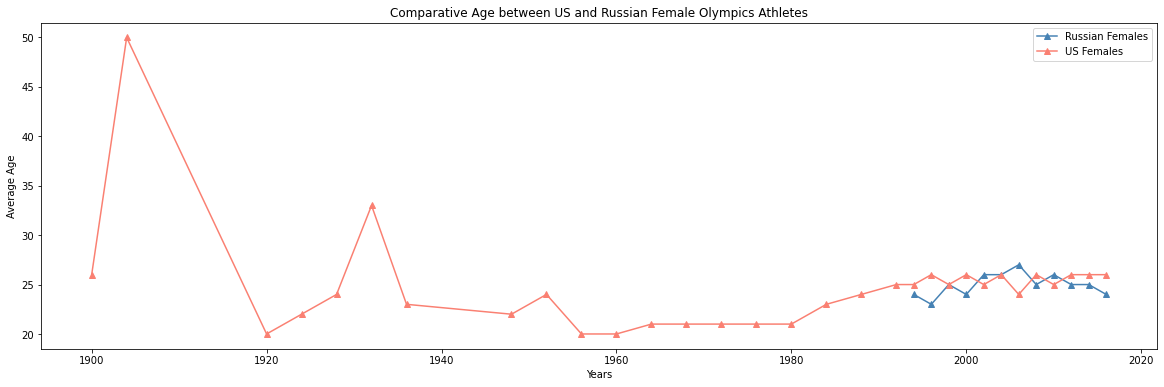

In [208]:
women_rus = women_age_rus
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(women_rus['Year'], women_rus['Age'], marker = '^', color='steelblue', label= "Russian Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Comparative Age between US and Russian Female Olympics Athletes")
plt.legend(loc="upper right")

plt.show()

# How does Japan compare to the US Average Female Age?

In [173]:
jpn_filter = starter_age_df[(starter_age_df["NOC"] == "JPN")]
jpn_reduced = jpn_filter.dropna(how='any')
jpn_reduced.head(10)

,ID,Sex,Age,NOC,Year
625,362,M,24.0,JPN,1936
626,363,M,24.0,JPN,1972
627,363,M,24.0,JPN,1972
628,363,M,28.0,JPN,1976
629,363,M,28.0,JPN,1976
630,364,M,25.0,JPN,1960
631,365,M,23.0,JPN,1992
632,366,M,25.0,JPN,1972
633,367,M,22.0,JPN,1988
634,367,M,22.0,JPN,1988


In [174]:
jpn_reduced["JPN_Age"] = jpn_reduced['ID'].map(str) + jpn_reduced['Age'].map(str)
jpn_reduced["JPN_Age"].duplicated().sum()
jpn_reduced.duplicated(subset = ["JPN_Age"]).sum()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2978

In [175]:
clean_jpn = jpn_reduced.drop_duplicates(subset = ["JPN_Age"])
clean_jpn=clean_jpn.set_index("JPN_Age")

In [176]:
jpn_fem_filter = jpn_reduced[(starter_age_df["Sex"] == "F")]
jpn_fem_filter.count()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ID         2771
Sex        2771
Age        2771
NOC        2771
Year       2771
JPN_Age    2771
dtype: int64

In [177]:
jpn_age = jpn_fem_filter.groupby(["Year"])
jpn_count = round(jpn_age['Age'].mean())
jpn_age_final = pd.DataFrame(data=jpn_count)
women_age_jpn = jpn_age_final.reset_index()
women_age_jpn

,Year,Age
0,1928,21.0
1,1932,18.0
2,1936,19.0
3,1952,19.0
4,1956,21.0
5,1960,22.0
6,1964,23.0
7,1968,21.0
8,1972,22.0
9,1976,21.0


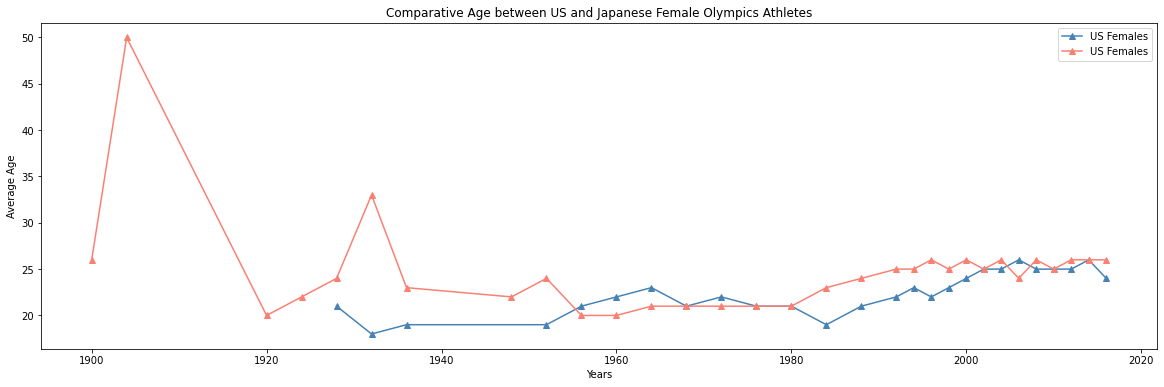

In [209]:
women_jpn = women_age_jpn
us_women = us_women_age

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(women_jpn['Year'], women_jpn['Age'], marker = '^', color= 'steelblue', label= "US Females")
plt.plot(us_women['Year'], us_women['Age'], marker = '^', color='salmon', label= "US Females")

plt.xlabel("Years")
plt.ylabel("Average Age")
plt.title("Comparative Age between US and Japanese Female Olympics Athletes")
plt.legend(loc="upper right")

plt.show()